In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
df = pd.read_csv(r'E:/AI_ML_Final/concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [2]:
df['concrete_compressive_strength'].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: concrete_compressive_strength, dtype: float64

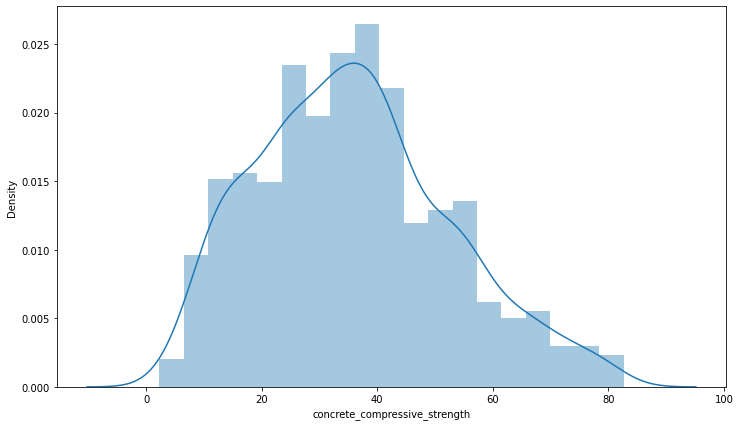

In [3]:
#distribution of target variable
plt.figure(figsize=(12,7));
sns.distplot(df.concrete_compressive_strength);

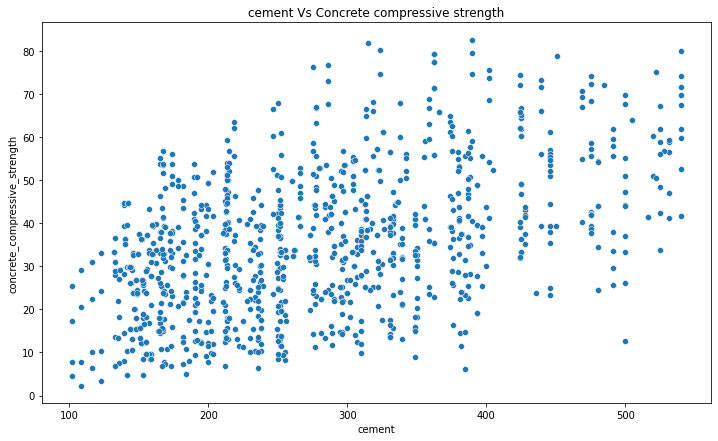

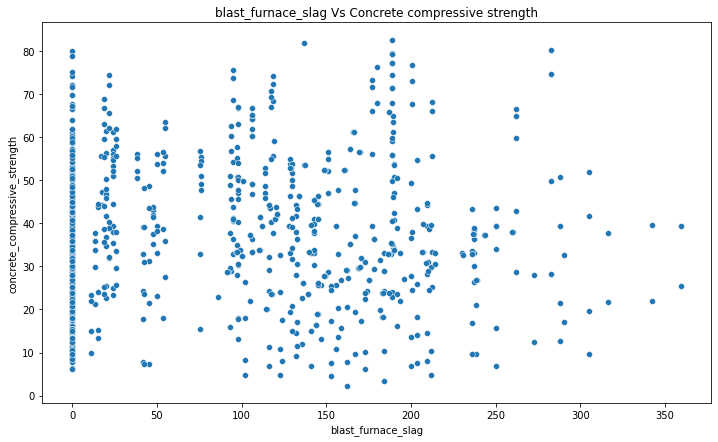

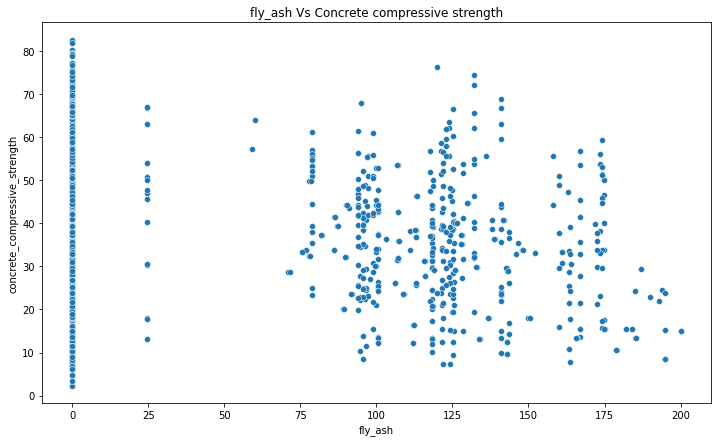

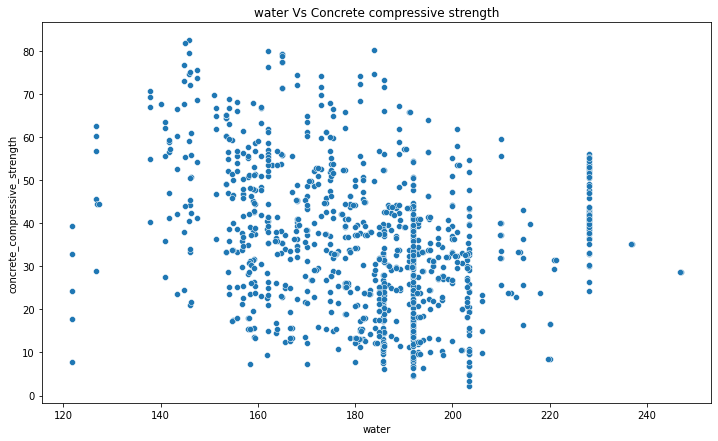

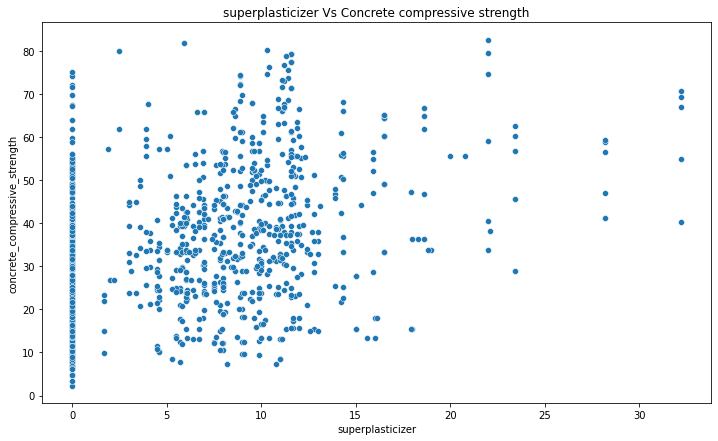

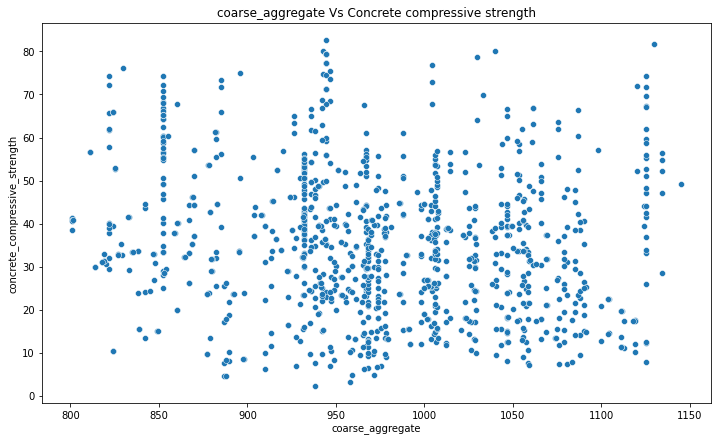

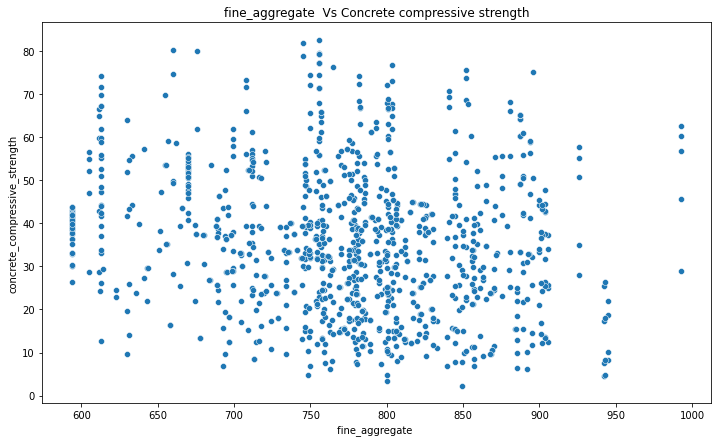

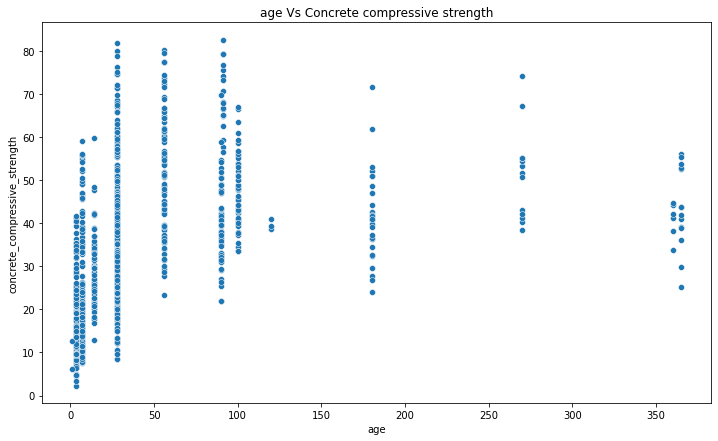

In [4]:
#Independent features Vs dependent feature - Visualization 
for i in df.columns:
    if i != 'concrete_compressive_strength':
        plt.figure(figsize=(12,7))
        plt.title(i+' '+'Vs Concrete compressive strength')
        sns.scatterplot(x = df[i],y=df.concrete_compressive_strength)

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

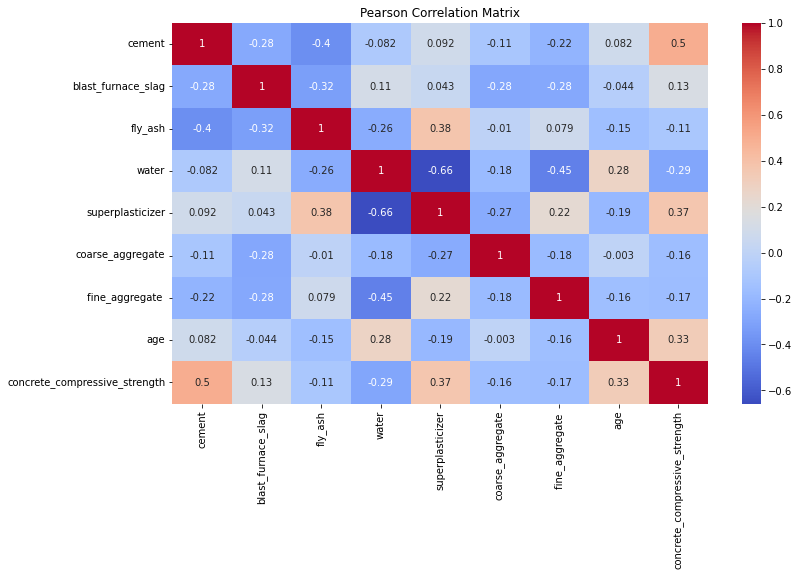

In [5]:
#Pearson Correlation matrix
plt.figure(figsize=(12,7))
plt.title('Pearson Correlation Matrix')
sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm')

In [6]:
#Inferences:
#- Age, Cement, super plasticizer and Blast furnace slag are in positive correlation to the Concrete compressive strength.
#- While water, coarse aggregae and fine aggregate are in negative correlation to the Concrete compressive strength.
#- Fly ash is having nearly 0 correlation with the target variable.
#- Super plasticizer is having negative correlation to the water.

In [7]:
#with the following function we can select highly correlated features
#it will remove the first feature that is correlated with anything other feature

def correlation(dataset,thresold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>thresold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [8]:
corr_features = correlation(df,0.7)

In [9]:
len(set(corr_features))

0

<AxesSubplot:title={'center':'Spearman rank Correlation Matrix'}>

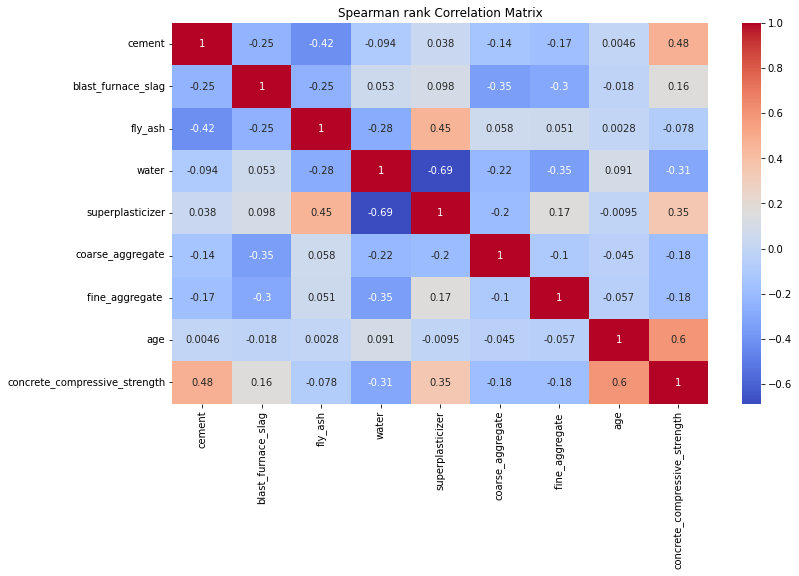

In [10]:
#Spearman rank correlation matrix to capture non linear relationships as well
plt.figure(figsize=(12,7))
plt.title('Spearman rank Correlation Matrix')
sns.heatmap(df.corr(method = 'spearman'),annot=True, cmap = 'coolwarm')

In [11]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [12]:
#outliers check
def outl(x):
    plt.figure(figsize=(12,7))
    plt.subplot(121)
    plt.boxplot(df[x])
    plt.subplot(122)
    sns.distplot(df[x])
    plt.tight_layout()
    plt.show()

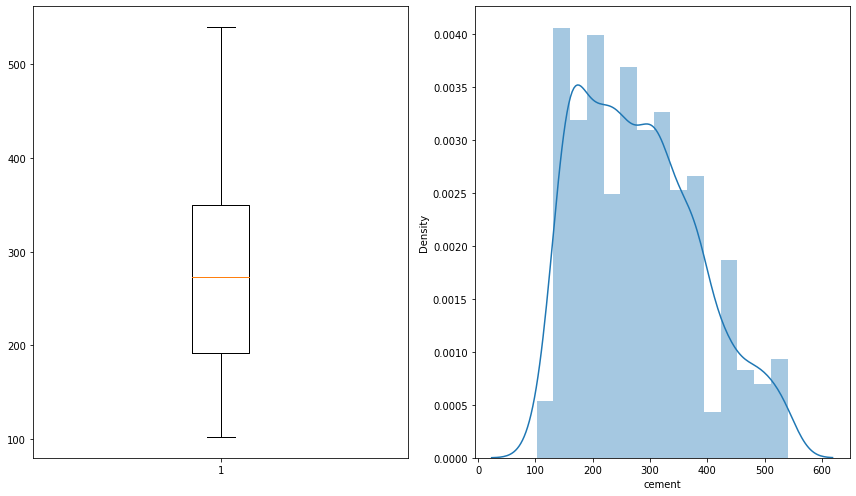

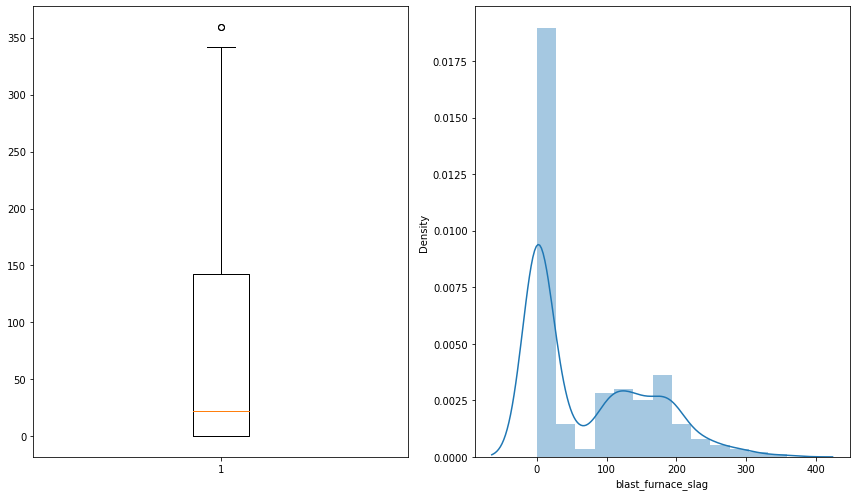

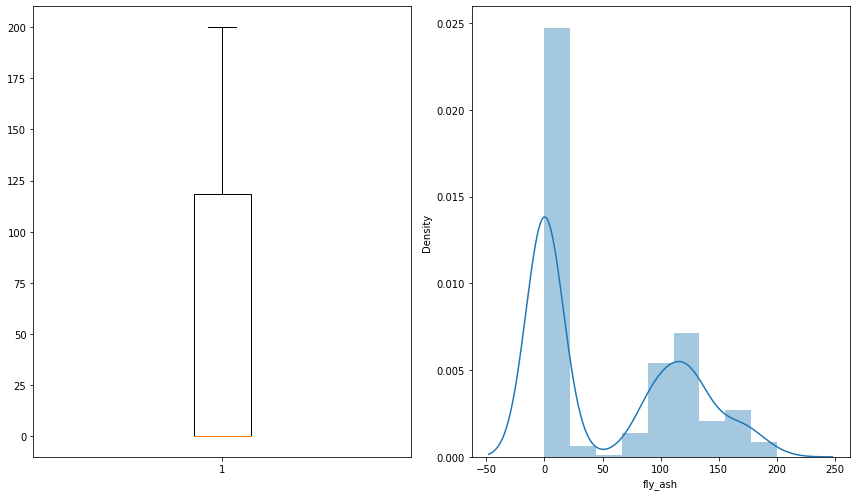

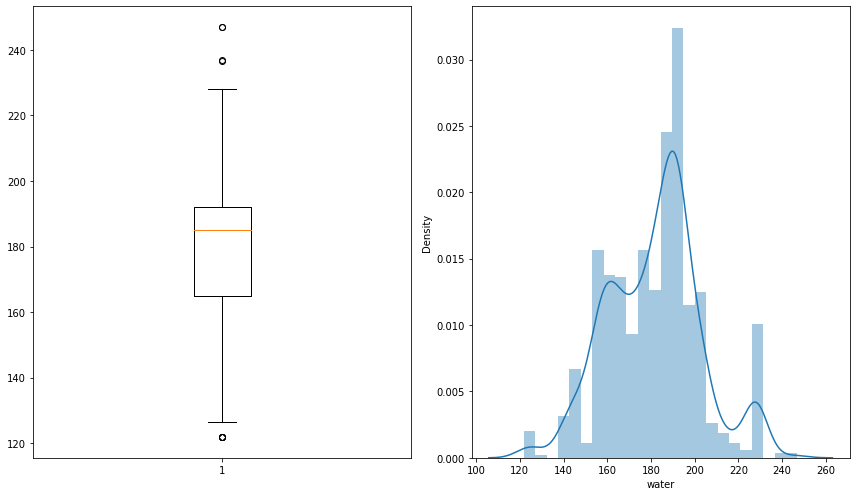

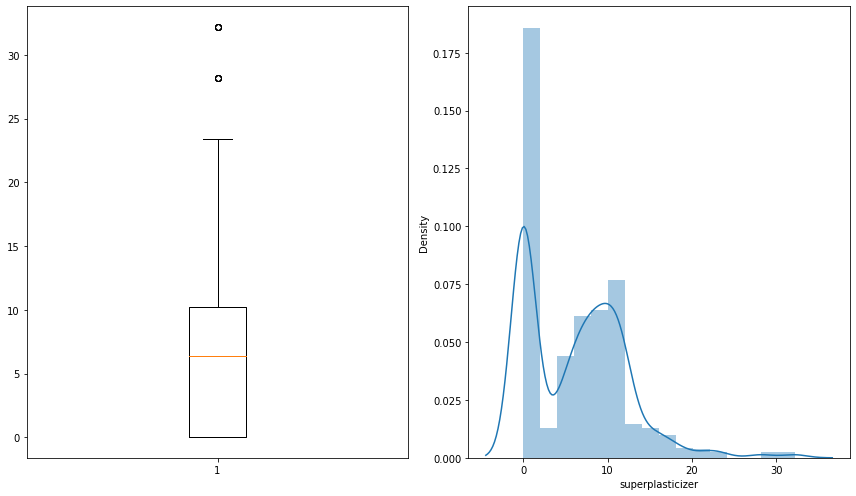

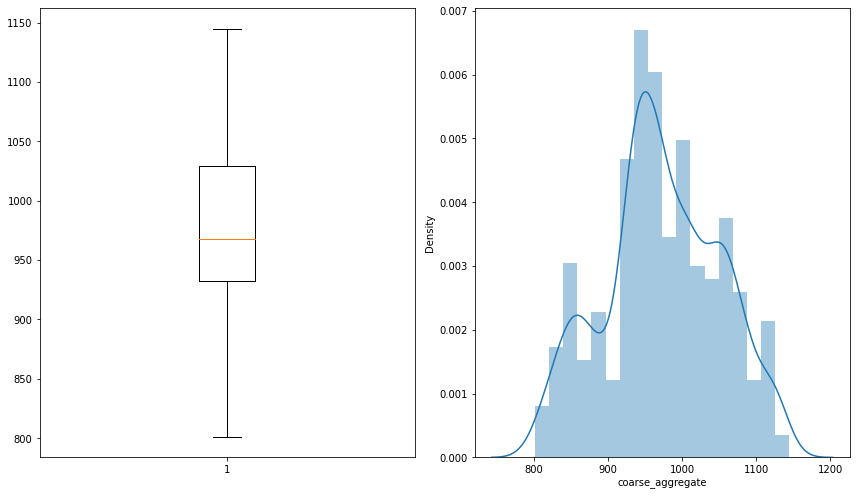

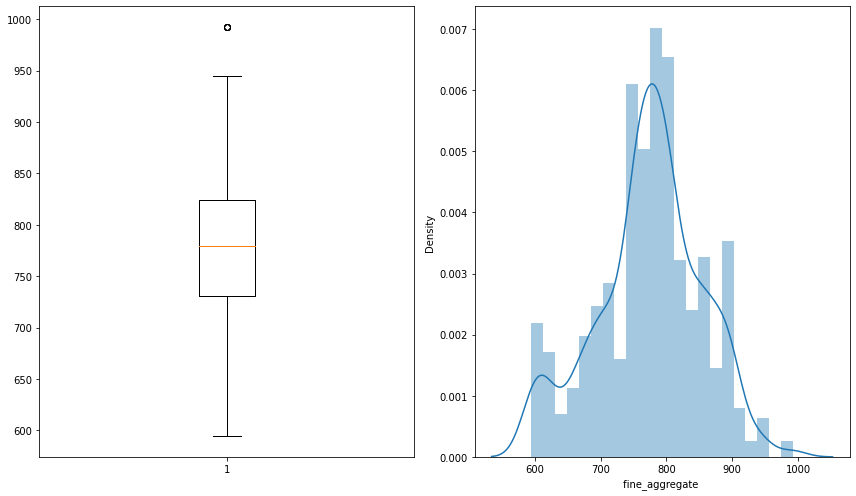

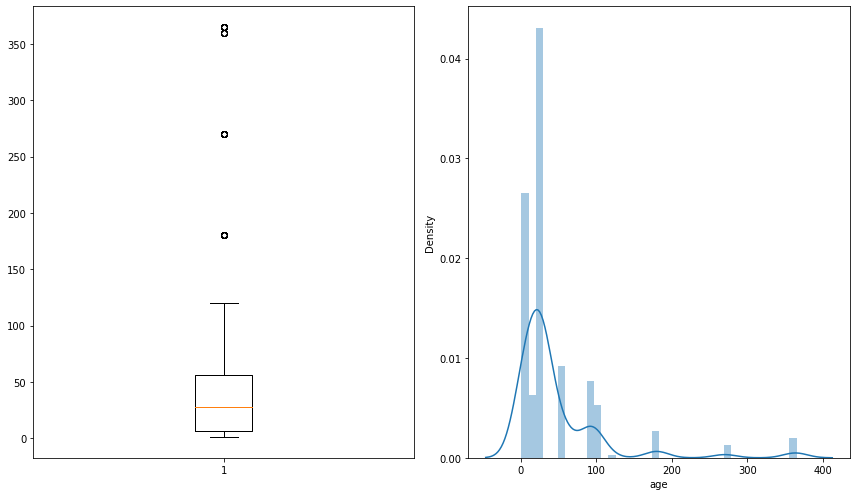

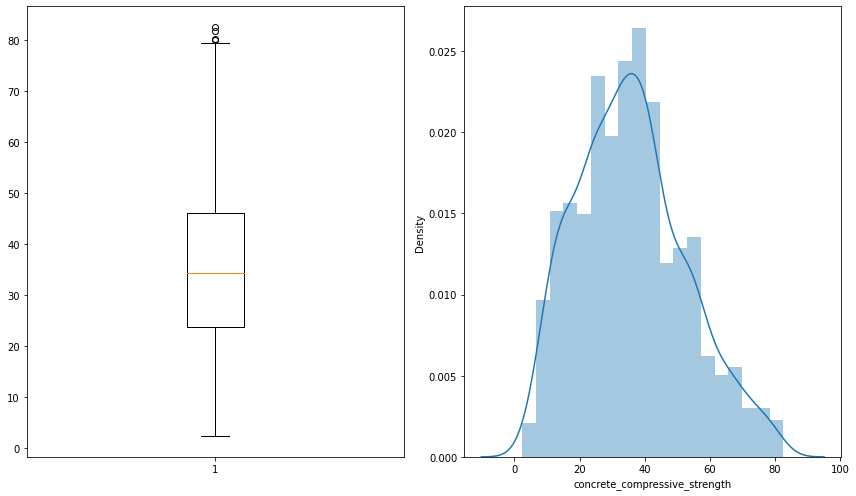

In [13]:
for col in df.columns:
    outl(col)

In [14]:
#Inference:let's do outlier treatment for `age` column. 
#describing age column
df['age'].describe()

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64

In [15]:
#using iqr method, considering both including and excluding the lower and upper limits into two separate dataframes, 
# then merging both the dataframes into one.
# This increases the data size so that a Machine learning model can be trained efficiently.
q1 = df['age'].quantile(0.25)
q2 = df['age'].quantile(0.50)
q3 = df['age'].quantile(0.75)
IQR = q3-q1

lower_limit = q1-1.5*IQR
upper_limit = q3+1.5*IQR

data_inc = df.loc[(df['age']>=lower_limit) & (df['age']<=upper_limit)]
data_esc = df.loc[(df['age']>lower_limit) & (df['age']<upper_limit)]
df = pd.concat([data_inc,data_esc])

In [16]:
df['age'].describe()

count    1942.000000
mean       32.514933
std        28.609012
min         1.000000
25%         7.000000
50%        28.000000
75%        28.000000
max       120.000000
Name: age, dtype: float64

<AxesSubplot:title={'center':'age Vs Concrete compressive strength'}, xlabel='age', ylabel='concrete_compressive_strength'>

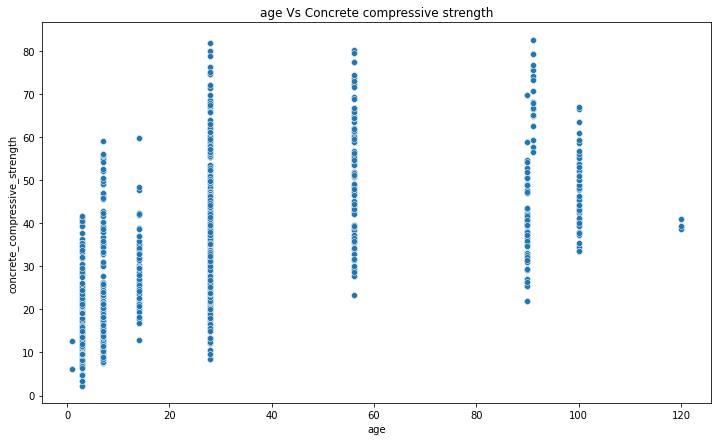

In [17]:
#Independent features Vs dependent feature - Visualization 
plt.figure(figsize=(12,7))
plt.title('age'+' '+'Vs Concrete compressive strength')
sns.scatterplot(x = df['age'],y=df['concrete_compressive_strength'])

In [18]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


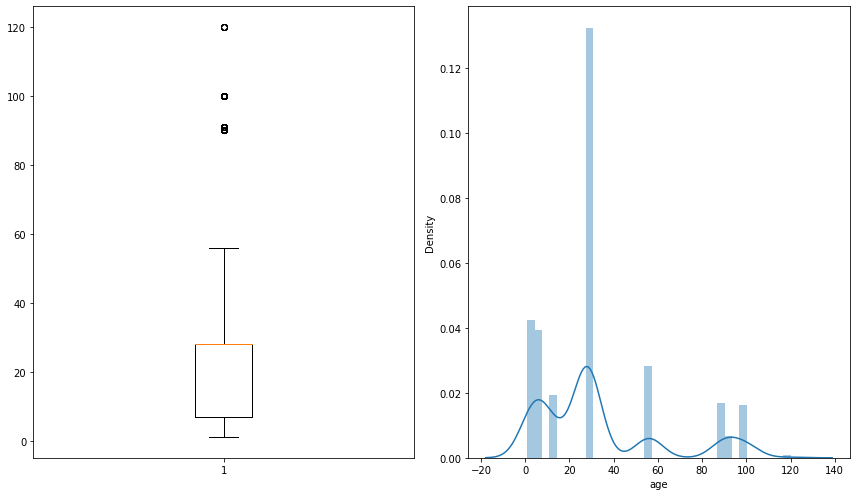

In [19]:
#Checking the outlier for age
outl('age')

In [20]:
import sklearn
import statsmodels.api as sm

In [21]:
#Linear Regression
#train test split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.30, shuffle=True, random_state=42)
print('The shapes for df_train is {0}, df_test is {1}'.format(df_train.shape,df_test.shape))

The shapes for df_train is (1359, 9), df_test is (583, 9)


In [22]:
#Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler

def fscale(train,test):
    scaler = StandardScaler()
    train = scaler.fit_transform(train)
    test = scaler.transform(test)
    
    return train, test

In [23]:
#calling the above function
df_train_sc,df_test_sc = fscale(df_train,df_test)

In [24]:
df_train_sc = pd.DataFrame(df_train_sc,columns=df.columns)
df_train_sc

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,0.328223,-0.877750,-0.887887,-0.109893,0.246385,0.370758,0.586185,-0.161728,-0.615519
1,1.993371,-0.877750,-0.887887,-1.682308,-1.111360,1.916718,0.298723,-0.161728,2.183089
2,0.178428,-0.877750,0.943168,-0.271543,0.500962,0.667614,-0.303393,2.372254,1.272900
3,-0.630469,-0.877750,1.826749,-1.035708,0.874342,0.934912,-0.065136,-0.161728,0.550717
4,-0.257429,0.240977,0.290221,0.659169,0.297300,-1.739354,0.575826,-0.161728,-0.120137
...,...,...,...,...,...,...,...,...,...
1354,-0.434285,-0.877750,0.586307,0.860007,-0.330657,-0.306482,0.974646,2.372254,-0.050903
1355,-0.014857,0.249042,-0.506093,-0.962230,0.789483,1.167512,0.072120,0.823710,1.874520
1356,0.331123,-0.877750,-0.887887,-0.114792,0.246385,0.374614,0.583595,-0.161728,-0.615519
1357,0.050860,-0.704929,1.309378,-0.065807,-0.177911,-1.655824,0.311672,0.823710,0.543555


In [25]:
#Check
df_test_sc = pd.DataFrame(df_test_sc,columns=df.columns)
df_test_sc

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,-0.644965,0.750222,-0.887887,1.134323,-1.111360,0.032781,-0.348713,-0.161728,-0.144011
1,0.334022,2.143158,-0.887887,-0.237254,0.348216,0.977320,-2.138227,2.055506,1.861389
2,0.387175,1.570545,-0.887887,-1.207155,1.315609,-1.526030,1.339800,-0.900805,-0.120137
3,-0.644965,0.750222,-0.887887,1.134323,-1.111360,0.032781,-0.348713,-1.041582,-1.707149
4,0.920641,1.302097,-0.887887,-0.501772,0.602793,-0.575066,-0.261957,-0.161728,1.532528
...,...,...,...,...,...,...,...,...,...
578,-1.292468,-0.877750,1.901549,1.060845,0.246385,-1.887139,1.192185,-0.161728,-1.484526
579,2.379940,-0.877750,-0.887887,0.424042,-1.111360,1.980973,-2.122688,-0.900805,0.418217
580,0.331123,0.792851,-0.887887,-2.613021,0.246385,0.374614,0.583595,-0.161728,0.543555
581,-1.302133,1.080886,1.184711,0.570996,0.246385,-2.015648,0.363467,-0.161728,-0.330824


In [26]:
y_train_sc = df_train_sc['concrete_compressive_strength']
X_train_sc = df_train_sc.drop('concrete_compressive_strength',axis=1)
y_test_sc = df_test_sc['concrete_compressive_strength']
X_test_sc = df_test_sc.drop('concrete_compressive_strength',axis=1)

In [27]:
#A) Feature selection using Backward Elimination
"""As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and 
then iteratively remove the worst performing features one by one till the overall performance of the model comes in acce
ptable range.
"""
#The performance metric used here to evaluate feature performance is p-value. 
#If the p-value is above 0.05 then we remove the feature, else we keep it.

'As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and \nthen iteratively remove the worst performing features one by one till the overall performance of the model comes in acce\nptable range.\n'

In [28]:
#Ref:
#- https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [29]:
#Importing statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#Function for model building and fitting
def lr_sm(X_train,y_train):
    X_train_const = sm.add_constant(X_train)
    lr = sm.OLS(y_train,X_train_const).fit()
    return lr

In [30]:
#calling function
lr_sm = lr_sm(X_train_sc,y_train_sc)

In [31]:
lr_sm.pvalues

const                  1.000000e+00
cement                 2.972168e-67
blast_furnace_slag     1.852821e-31
fly_ash                1.692251e-12
water                  5.161767e-12
superplasticizer       3.187916e-02
coarse_aggregate       9.600872e-01
fine_aggregate         8.002238e-01
age                   9.517233e-217
dtype: float64

In [32]:
#Inference:
#Here, `coarse_aggregate` feature is having the highest p value. 
#Let's automate this feature elimination process and ultimately 
#we will end up having the features whose p values are less than 5%.

In [33]:
#Backward Elimination 
cols = list(X_train_sc.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train_sc[cols]
    X_1 = sm.add_constant(X_1)
    lr = sm.OLS(y_train_sc,X_1).fit()
    p = pd.Series(lr.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'age']


In [34]:
#Inference:
#Backward Elimination technique has eliminated two features - `coarse_aggregate` and `fine_aggregate`.
#This elimination happened w.r.t. the p values of each feature and
#now we left with those which are having their respective p values < 5%.

In [35]:
X_train_be = X_train_sc[selected_features_BE]
X_test_be = X_test_sc[selected_features_BE]

#building a linear regression model
lr = LinearRegression()

#fitting
lr.fit(X_train_be,y_train_sc)

#predictions
y_pred_train_be = lr.predict(X_train_be)
y_pred_test_be = lr.predict(X_test_be)

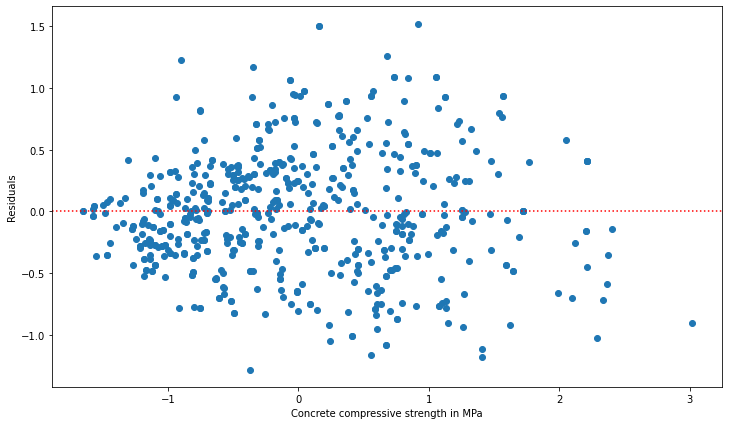

In [36]:
y_res = y_test_sc - y_pred_test_be
#residual vs predicitons plot
plt.figure(figsize=(12,7))
plt.scatter(y_pred_test_be, y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Concrete compressive strength in MPa")
plt.ylabel("Residuals")
plt.show()

In [37]:
#Check R2 score, rmse
from sklearn.metrics import r2_score,mean_squared_error

"""(coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
 In the general case when the true y is non-constant, a constant model that always predicts the average y 
 disregarding the input features would get a R^2 score of 0.0.

In the particular case when y_true is constant, the R^2 score

"""
"""
mse A non-negative floating point value (the best value is 0.0),
 or an array of floating point values, one for each individual target.


"""

'\nmse A non-negative floating point value (the best value is 0.0),\n or an array of floating point values, one for each individual target.\n\n\n'

In [38]:
#function for adjusted r2_score
def adjusted_r2_score(data,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    n = data.shape[0]
    p = data.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [39]:
#function for rmse
def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [40]:
#Evaluation 
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_be))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_be))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_be))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_be))

R2 score of train data is  0.7507812641482239
Adj. R2 score of train data is  0.7496752638411894
rmse score of train data is  0.49921812452251385

R2 score of test data is  0.773336420767055
Adj. R2 score of train data is  0.7709753418167118
rmse score of test data is  0.48670753081366813


In [41]:
#Storing results
results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
                                 'Test_R2 score','Test_Adj_R2 score','Test_RMSE score'])
results.loc[len(results)] = ['Linear Regression_BE',r2_score(y_train_sc,y_pred_train_be),
                             adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be),
                             rmse(y_train_sc,y_pred_train_be),r2_score(y_test_sc,y_pred_test_be),
                             adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be),rmse(y_test_sc,y_pred_test_be)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708


In [42]:
#importing decision tree regressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [43]:
dt = DecisionTreeRegressor()

In [44]:
#Splitting data set
y = df['concrete_compressive_strength']
X = df.drop('concrete_compressive_strength',axis=1)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=42, shuffle = True)
print('The shapes of X_train = {0}, y_train = {1}, X_test = {2},y_test = {3}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

The shapes of X_train = (1359, 8), y_train = (1359,), X_test = (583, 8),y_test = (583,)


In [46]:
#importing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

params = {'criterion':['mse','friedman_mse','mae','poisson'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10]}

# randomized search cv
rcv = RandomizedSearchCV(estimator=dt, param_distributions=params, n_iter = 10, 
                                scoring='r2', cv = 10, verbose=2, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [47]:
# best estimator
rcv.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=2, min_samples_split=12)

In [48]:
# best parameters
rcv.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_depth': 20,
 'criterion': 'friedman_mse'}

In [49]:
# best score
rcv.best_score_

0.9132489642991137

In [50]:
#Based on the above parameters, let's build a decision tree regressor
dt1 = rcv.best_estimator_
dt1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=2, min_samples_split=12)

In [51]:
dt1.feature_importances_

array([0.37813915, 0.0982284 , 0.01148342, 0.11963122, 0.02395377,
       0.03470442, 0.02009634, 0.31376327])

In [52]:
dt1_feature_imp = pd.DataFrame(dt1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])
dt1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace=True)
dt1_feature_imp

,Feature_importance
cement,0.378139
age,0.313763
water,0.119631
blast_furnace_slag,0.098228
coarse_aggregate,0.034704
superplasticizer,0.023954
fine_aggregate,0.020096
fly_ash,0.011483


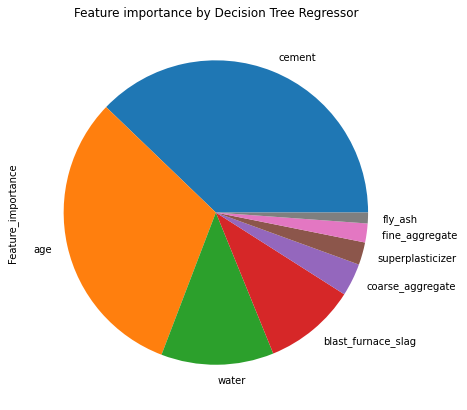

In [53]:
dt1_feature_imp['Feature_importance'].plot(kind='pie', title = 'Feature importance by Decision Tree Regressor', figsize=(12,7))
plt.show()

In [54]:
top_features_dt1 = ['cement','age','water','blast_furnace_slag']
#instantiating
dt2 = DecisionTreeRegressor()
#Considering only the above features
X_train_dt = X_train[top_features_dt1]
X_test_dt = X_test[top_features_dt1]

In [55]:
#using randomized search CV for finding out the best hyper parameters
params = {'criterion':['mse','friedman_mse','mae'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10]}
rcv1 = RandomizedSearchCV(estimator=dt2, param_distributions=params, n_iter = 10, 
                                scoring='r2', cv = 10, verbose=2, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv1.fit(X_train_dt,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [56]:
rcv1.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_depth': 20,
 'criterion': 'friedman_mse'}

In [57]:
rcv1.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=2, min_samples_split=12)

In [58]:
rcv1.best_score_

0.8997345669394325

In [59]:
#building a decision tree regressor using the best params by the Randomized search CV
dt2 = rcv1.best_estimator_
#fitting on train data
dt2.fit(X_train_dt,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=2, min_samples_split=12)

In [60]:
#predictions on train data
y_pred_train = dt2.predict(X_train_dt)

In [61]:
#predictions on test data
y_pred_test = dt2.predict(X_test_dt)

In [62]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_dt,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_dt,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.96314839978811
Adj. R2 score of train data is  0.9630395324315018
rmse score of train data is  3.2163728048916322

R2 score of test data is  0.917488539985366
Adj. R2 score of train data is  0.9169175264212508
rmse score of test data is  4.920084218297066


In [63]:
#Updating the results
results.loc[len(results)] = ['Decision tree regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_dt,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_dt,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,Decision tree regressor,0.963148,0.963040,3.216373,0.917489,0.916918,4.920084


In [64]:
#Inference the trainR2Score is more than the testR2 score hence overfitting of model exist

In [65]:
#Post-Pruning technique to overcome overfitting
#reference- https://towardsdatascience.com/3-techniques-to-avoid-overfitting-of-decision-trees-1e7d3d985a09

In [66]:
#Let's implement post pruning technique to tackle overfitting
#using only the top 4 features i.e., in the list "top_features_dt1" 
# compute ccp_alpha values

#Instantiate decision tree regressor with default parameters, meaning max_depth = None
dt3 = DecisionTreeRegressor(random_state=42)
path = dt3.cost_complexity_pruning_path(X_train_dt, y_train)#Compute the pruning path during Minimal Cost-Complexity Pruning.
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [67]:
#Train dt regressor for each ccp_alpha_value
dts = []
for ccp_alpha in ccp_alphas:
    dt3 = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    dt3.fit(X_train_dt, y_train)
    dts.append(dt3)

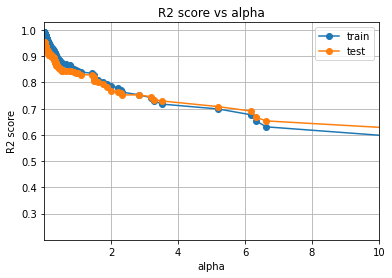

In [68]:
# Plot train and test score for each of the above trained model    
dts = dts[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [r2_score(y_train, dt3.predict(X_train_dt)) for dt3 in dts]
test_scores = [r2_score(y_test, dt3.predict(X_test_dt)) for dt3 in dts]


fig, ax = plt.subplots()

# plt.figure(figsize=(12,7))

ax.set_xlabel("alpha")
plt.xlim(0.00001,10)
ax.set_ylabel("R2 score")
ax.set_title("R2 score vs alpha")
plt.grid()
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

In [69]:
#Inference:
#When the CCP alpha value is around 0.8, we see that both the train and test R2 scores are in range 0.84-0.86. 
#Let's build a decision with that CCP alpha value i.e. 0.8.

In [70]:
#Building Decisiontree regressor with ccp_alpha = 0.8
dt3 = DecisionTreeRegressor(random_state=42, ccp_alpha=0.8)

In [71]:
#fitting the model
dt3.fit(X_train_dt,y_train)

DecisionTreeRegressor(ccp_alpha=0.8, random_state=42)

In [72]:
#parameters
dt3.get_params()

{'ccp_alpha': 0.8,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [73]:
#predictions on the train data
y_pred_train = dt3.predict(X_train_dt)

In [74]:
#predictions on the test data
y_pred_test = dt3.predict(X_test_dt)

In [75]:
#evaluation metrics
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_dt,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_dt,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.8633532727811306
Adj. R2 score of train data is  0.8629495896874264
rmse score of train data is  6.193523975977008

R2 score of test data is  0.8448222150480376
Adj. R2 score of train data is  0.8437483203424876
rmse score of test data is  6.747302403439831


In [76]:
#Inference: This Decision tree regressor model is the best one compared to the previous one, as it tackled overfitting.

In [77]:
#Updating the results
results.loc[len(results)] = ['Decision tree regressor_best',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_dt,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_dt,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,Decision tree regressor,0.963148,0.963040,3.216373,0.917489,0.916918,4.920084
2,Decision tree regressor_best,0.863353,0.862950,6.193524,0.844822,0.843748,6.747302


In [78]:
import time

In [79]:
start = time.time()

In [80]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [81]:
params = {'n_estimators':[5,10,20,40,80,100,200],
          'criterion':['mse','mae'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10],
          'oob_score': [True]}


#randomized search cv
rcv = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 10, scoring = 'r2', cv = 10, verbose=5, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'oob_score': [True]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [82]:
end = time.time()

In [83]:
print(f"Runtime of the program is {end - start}")

Runtime of the program is 129.67900586128235


In [84]:
# best parameters
rcv.best_params_

{'oob_score': True,
 'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_depth': 20,
 'criterion': 'mse'}

In [85]:
# best estimator
rcv.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=20, min_samples_leaf=4,
                      min_samples_split=8, n_estimators=80, oob_score=True)

In [86]:
#Best score
rcv.best_score_

0.929117048160208

In [87]:
import time

In [88]:
#Building randomforest regressor with the best estimator 
rf1 = rcv.best_estimator_
#fitting
rf1.fit(X_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=20, min_samples_leaf=4,
                      min_samples_split=8, n_estimators=80, oob_score=True)

In [89]:
#feature importances
rf1.feature_importances_
rf1_feature_imp = pd.DataFrame(rf1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])
rf1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
rf1_feature_imp

,Feature_importance
age,0.338138
cement,0.333335
water,0.107066
blast_furnace_slag,0.081138
superplasticizer,0.071494
fine_aggregate,0.023523
coarse_aggregate,0.023408
fly_ash,0.021898


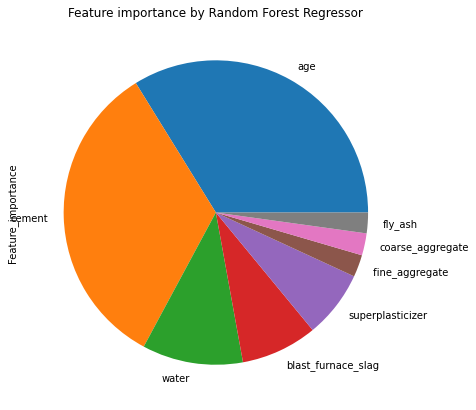

In [90]:
#visualizing
rf1_feature_imp['Feature_importance'].plot(kind='pie', title='Feature importance by Random Forest Regressor', figsize=(12,7))
plt.show()

In [91]:
#Inference: Here the last three features are contributing less to the Concrete compressive strength prediction.
#So, let's drop them and consider only the top 5 features.

In [92]:
features_by_rf = ['age','cement','water','blast_furnace_slag','superplasticizer']

In [93]:
#Considering only the above features
X_train_rf = X_train[features_by_rf]
X_test_rf = X_test[features_by_rf]

In [94]:
#instantiating random forest regressor
rf2 = RandomForestRegressor()

#using Randomized Search CV for hyper parameter tuning
params = {'n_estimators':[5,10,20,40,80,100,200],
          'criterion':['mse','mae'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10],
          'oob_score': [True]}

rcv = RandomizedSearchCV(estimator = rf2, param_distributions = params, n_iter = 10, scoring = 'r2', cv = 10, verbose=5, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train_rf,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'oob_score': [True]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [95]:
#best parameters
rcv.best_params_

{'oob_score': True,
 'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_depth': 20,
 'criterion': 'mse'}

In [96]:
#best estimator
rcv.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=20, min_samples_leaf=4,
                      min_samples_split=8, n_estimators=80, oob_score=True)

In [97]:
#best score
rcv.best_score_

0.9205954916690947

In [98]:
# rebuilding the random forest regressor using the best estimator suggested by the Randomized Search CV
rf2 = rcv.best_estimator_

#fitting on the training data
rf2.fit(X_train_rf,y_train)

RandomForestRegressor(criterion='mse', max_depth=20, min_samples_leaf=4,
                      min_samples_split=8, n_estimators=80, oob_score=True)

In [99]:
#predictions on train data
y_pred_train = rf2.predict(X_train_rf)

In [100]:
#predictions on test data
y_pred_test = rf2.predict(X_test_rf)

In [101]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_rf,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_rf,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.9607001299345382
Adj. R2 score of train data is  0.9605548975987457
rmse score of train data is  3.3214962246621456

R2 score of test data is  0.9408745191354989
Adj. R2 score of train data is  0.9403621666150093
rmse score of test data is  4.164882405779438


In [102]:
#Updating the results
results.loc[len(results)] = ['Random Forest regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_rf,y_train,y_pred_train),rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),adjusted_r2_score(X_test_rf,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,Decision tree regressor,0.963148,0.963040,3.216373,0.917489,0.916918,4.920084
2,Decision tree regressor_best,0.863353,0.862950,6.193524,0.844822,0.843748,6.747302
3,Random Forest regressor,0.960700,0.960555,3.321496,0.940875,0.940362,4.164882


In [103]:
#5. Gradient Boosting Regressor

In [104]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [105]:
params = {'n_estimators':[5,10,20,40,80,100,200],
          'learning_rate':[0.1,0.2,0.5,0.8,1],
          'loss':['lr','lad','huber'],
          'subsample':[0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'criterion':['friedman_mse','mse'],
          'min_samples_split':[2,4,8,10],
          'min_samples_leaf':[1,10,20,50]
         }

#randomized search cv
rcv = RandomizedSearchCV(estimator = gbr, param_distributions = params, n_iter = 10, scoring = 'r2', n_jobs = -1,
                         cv = 10, verbose = 5, random_state = 42, return_train_score = True)

rcv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse'],
                                        'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          1],
                                        'loss': ['lr', 'lad', 'huber'],
                                        'min_samples_leaf': [1, 10, 20, 50],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'subsample': [0.001, 0.009, 0.01, 0.09,
                                                      0.1, 0.4, 0.9, 1]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [106]:
# best estimator
rcv.best_estimator_

GradientBoostingRegressor(criterion='mse', learning_rate=0.8, loss='huber',
                          min_samples_leaf=10, min_samples_split=8,
                          n_estimators=20, subsample=0.9)

In [107]:
# best parameters
rcv.best_params_

{'subsample': 0.9,
 'n_estimators': 20,
 'min_samples_split': 8,
 'min_samples_leaf': 10,
 'loss': 'huber',
 'learning_rate': 0.8,
 'criterion': 'mse'}

In [108]:
#best score
rcv.best_score_

0.8875114376252841

In [109]:
#building Gradient boosting regressor
gbr1 = rcv.best_estimator_

In [110]:
#feature importances
gbr1_feature_imp = pd.DataFrame(gbr1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])
gbr1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
gbr1_feature_imp

,Feature_importance
age,0.397213
cement,0.339520
water,0.112240
blast_furnace_slag,0.063979
fly_ash,0.036874
superplasticizer,0.021244
fine_aggregate,0.021099
coarse_aggregate,0.007831


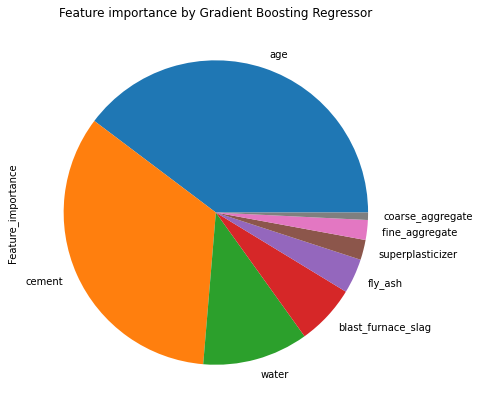

In [111]:
#Visualization
gbr1_feature_imp['Feature_importance'].plot(kind='pie',title='Feature importance by Gradient Boosting Regressor', figsize=(12,7))
plt.show()

In [112]:
#Inference: Here the contribution of the last 2 features is very low. Let's eliminate them.

In [113]:
#Considering 
top_features_gbr = ['age','cement','water','blast_furnace_slag','fine_aggregate ','superplasticizer']

In [114]:
X_train_gbr = X_train[top_features_gbr]
X_test_gbr = X_test[top_features_gbr]

In [115]:
gbr2 = GradientBoostingRegressor()

In [116]:
params = {'n_estimators':[5,10,20,40,80,100,200],
          'learning_rate':[0.1,0.2,0.5,0.8,1],
          'loss':['lr','lad','huber'],
          'subsample':[0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'criterion':['friedman_mse','mse'],
          'min_samples_split':[2,4,8,10],
          'min_samples_leaf':[1,10,20,50]
         }

#randomized search cv
rcv = RandomizedSearchCV(estimator = gbr2, param_distributions = params, n_iter = 10, scoring = 'r2', n_jobs = -1,
                         cv = 10, verbose = 5, random_state = 42, return_train_score = True)

rcv.fit(X_train_gbr,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse'],
                                        'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          1],
                                        'loss': ['lr', 'lad', 'huber'],
                                        'min_samples_leaf': [1, 10, 20, 50],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200],
                                        'subsample': [0.001, 0.009, 0.01, 0.09,
                                                      0.1, 0.4, 0.9, 1]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [117]:
#best score
rcv.best_score_

0.8916140894546258

In [118]:
# best estimator
rcv.best_estimator_

GradientBoostingRegressor(criterion='mse', learning_rate=0.8, loss='huber',
                          min_samples_leaf=10, min_samples_split=8,
                          n_estimators=20, subsample=0.9)

In [119]:
# best parameters
rcv.best_params_

{'subsample': 0.9,
 'n_estimators': 20,
 'min_samples_split': 8,
 'min_samples_leaf': 10,
 'loss': 'huber',
 'learning_rate': 0.8,
 'criterion': 'mse'}

In [120]:
gbr2 = rcv.best_estimator_
#fitting the best estimator on the training data
gbr2.fit(X_train_gbr,y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.8, loss='huber',
                          min_samples_leaf=10, min_samples_split=8,
                          n_estimators=20, subsample=0.9)

In [121]:
#Predictions on train set
y_pred_train = gbr2.predict(X_train_gbr)

In [122]:
#predictions on test set
y_pred_test = gbr2.predict(X_test_gbr)

In [123]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_gbr,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_gbr,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.9335601809932289
Adj. R2 score of train data is  0.9332653297254474
rmse score of train data is  4.318693929682719

R2 score of test data is  0.9112706010321547
Adj. R2 score of train data is  0.910346336459573
rmse score of test data is  5.102102399440301


In [124]:
#storing in results
results.loc[len(results)] = ['Gradient Boost regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_gbr,y_train,y_pred_train),rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),adjusted_r2_score(X_test_gbr,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,Decision tree regressor,0.963148,0.963040,3.216373,0.917489,0.916918,4.920084
2,Decision tree regressor_best,0.863353,0.862950,6.193524,0.844822,0.843748,6.747302
3,Random Forest regressor,0.960700,0.960555,3.321496,0.940875,0.940362,4.164882
4,Gradient Boost regressor,0.933560,0.933265,4.318694,0.911271,0.910346,5.102102


In [125]:
#XGBoost Regressor 
import xgboost

In [126]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
xgbr = XGBRegressor()

params = {
          'learning_rate': [0.1,0.2,0.5,0.8,1],
          'max_depth': [2,3,4,5,6,7,8,10],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'min_child_weight': [1,2,4,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0,1.4],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,8,10,50,100],
          'reg_lambda': [1,4,5,10,20,50,100,200,500,800,1000]
          
         }

#Using Randomized search cv
rcv = RandomizedSearchCV(estimator=xgbr, param_distributions=params, n_iter = 10, 
                                scoring='r2', cv = 10, verbose=2, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                                             1.4],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          1],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
                                        'min_child_weight': [1, 2, 4, 5, 8],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.5,
                                                      0.7, 0.9, 1, 4, 8, 10, 50,
                                                      100],
                                        'reg_lambda': [1, 4, 5, 10, 20, 50, 100,
                                                       200, 500, 800, 1000],
                                        'subsample': [0.001, 0.009, 0.01, 0.09,
                                                      0.1, 0.4, 0.9, 1]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [127]:
# best estimator
rcv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=4, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0.5,
             reg_lambda=1000, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [128]:
# best estimator
rcv.best_params_

{'subsample': 0.9,
 'reg_lambda': 1000,
 'reg_alpha': 0.5,
 'min_child_weight': 4,
 'max_depth': 4,
 'learning_rate': 1,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [129]:
#best score
rcv.best_score_

0.932854117009963

In [130]:
#Building XGboost regressor with best hyperparameters
xgbr = rcv.best_estimator_
#Fitting on train data
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=4, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0.5,
             reg_lambda=1000, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
#feature importances
xgbr_feature_imp = pd.DataFrame(xgbr.feature_importances_, index = X_train.columns, columns=['Feature_importance'])
xgbr_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
xgbr_feature_imp

,Feature_importance
age,0.447175
cement,0.211727
water,0.088063
fly_ash,0.082183
superplasticizer,0.071426
blast_furnace_slag,0.055894
fine_aggregate,0.027376
coarse_aggregate,0.016157


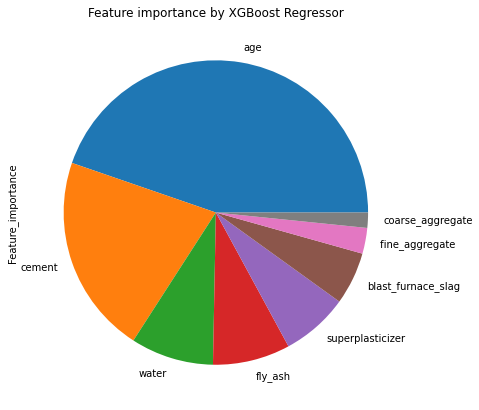

In [132]:
#Visualization
xgbr_feature_imp['Feature_importance'].plot(kind='pie',title='Feature importance by XGBoost Regressor',figsize=(12,7))
plt.show()

In [133]:
#Inference: Here the last two features are contributing very less for the prediction of the target variable. 
#Let's drop them and rebuild the model.

In [134]:
xgbr_top_features = ['age','cement','water','fly_ash','superplasticizer','blast_furnace_slag']

In [135]:
X_train_xgbr = X_train[xgbr_top_features]
X_test_xgbr = X_test[xgbr_top_features]

In [136]:
#Fitting on the training data
xgbr2 = XGBRegressor()
params = {
          'learning_rate': [0.1,0.2,0.5,0.8,1],
          'max_depth': [2,3,4,5,6,7,8,10],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'min_child_weight': [1,2,4,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0,1.4],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,8,10,50,100],
          'reg_lambda': [1,4,5,10,20,50,100,200,500,800,1000]
          
         }

#Using Randomized search cv
rcv = RandomizedSearchCV(estimator=xgbr2, param_distributions=params, n_iter = 10, 
                                scoring='r2', cv = 10, verbose=2, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train_xgbr,y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                                             1.4],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          1],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
                                        'min_child_weight': [1, 2, 4, 5, 8],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.5,
                                                      0.7, 0.9, 1, 4, 8, 10, 50,
                                                      100],
                                        'reg_lambda': [1, 4, 5, 10, 20, 50, 100,
                                                       200, 500, 800, 1000],
                                        'subsample': [0.001, 0.009, 0.01, 0.09,
                                                      0.1, 0.4, 0.9, 1]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [137]:
#best estimator
rcv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=4, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0.5,
             reg_lambda=1000, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
#best params
rcv.best_params_

{'subsample': 0.9,
 'reg_lambda': 1000,
 'reg_alpha': 0.5,
 'min_child_weight': 4,
 'max_depth': 4,
 'learning_rate': 1,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [139]:
#best score
rcv.best_score_

0.9206187747721722

In [140]:
xgbr2 = rcv.best_estimator_
#fitting
xgbr2.fit(X_train_xgbr, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=4, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0.5,
             reg_lambda=1000, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
#Predictions on train data
y_pred_train = xgbr2.predict(X_train_xgbr)

In [142]:
#predictions on test data
y_pred_test = xgbr2.predict(X_test_xgbr)

In [143]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_xgbr,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_xgbr,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.9435960493720329
Adj. R2 score of train data is  0.943345735981672
rmse score of train data is  3.9791743438660294

R2 score of test data is  0.9432538344721177
Adj. R2 score of train data is  0.9426627285812023
rmse score of test data is  4.080220759042842


In [144]:
#storing in results
results.loc[len(results)] = ['XG Boost regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_xgbr,y_train,y_pred_train),rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),adjusted_r2_score(X_test_xgbr,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,Decision tree regressor,0.963148,0.963040,3.216373,0.917489,0.916918,4.920084
2,Decision tree regressor_best,0.863353,0.862950,6.193524,0.844822,0.843748,6.747302
3,Random Forest regressor,0.960700,0.960555,3.321496,0.940875,0.940362,4.164882
4,Gradient Boost regressor,0.933560,0.933265,4.318694,0.911271,0.910346,5.102102
5,XG Boost regressor,0.943596,0.943346,3.979174,0.943254,0.942663,4.080221


In [145]:
#saving the final model
import joblib
joblib.dump(xgbr2, 'XGBoost_Regressor_model.pkl')

['XGBoost_Regressor_model.pkl']